# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Цель данного проекта: проанализировать поведение клиента и на базе данного анализа сделать вывод о том, какой тариф лучше

Задачи:
* Изучить файлы с данными, общую информацию;
* Заменить тип данных, заполнить пропуски, выявить ошибки/аномальные данные.
* Подготовить пользовательские данные(кол-во сделанных звонок и израсходованных минут, кол-во отправленных сообщений, объем израсходонного интернет-трафика, выручку с каждого пользователя);
* Анализ и описание данных
* Проверка гипотез:
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### 1. Изучение файлов с данными и общей информации по ним. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
import seaborn as sns


In [2]:
#calls = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/calls.csv")

In [3]:
calls = pd.read_csv("/datasets/calls.csv")

In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Сразу проверим, нет ли пробелов в названиях столбцов и перемеименуем первый столбцец.

In [5]:
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [6]:
calls.set_axis(['call_id', 'call_date', 'duration', 'user_id'], axis='columns', inplace=True)
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
#internet = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/internet.csv")

In [8]:
internet = pd.read_csv("/datasets/internet.csv")

In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

У нас есть столбец 	Unnamed: 0, который повторяет индексы нашего датасета. Удалим его и переименуем столбец id в более информативное название.

In [11]:
internet.drop(columns='Unnamed: 0', inplace=True)

In [12]:
internet.set_axis(['session_id', 'mb_used', 'session_date', 'user_id'], axis='columns', inplace=True)

In [13]:
internet

,session_id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [14]:
#messages = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/messages.csv")

In [15]:
messages = pd.read_csv("/datasets/messages.csv")

In [16]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [17]:
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [18]:
messages.set_axis(['message_id', 'message_date', 'user_id'], axis='columns', inplace=True)

In [19]:
messages.head()

,message_id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [20]:
#users = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/users.csv")

In [21]:
users = pd.read_csv("/datasets/users.csv")

In [22]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [23]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [24]:
#tariffs = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/tariffs.csv")

In [25]:
tariffs = pd.read_csv("/datasets/tariffs.csv")

In [26]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [27]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

Поменяем название столбца tariff_name на tariff, так как в прошлой таблице название столбца такое и по данному столбцу в будущем мы будем объединять наши датасеты.

In [28]:
tariffs.set_axis(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'], axis='columns', inplace=True)

In [29]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


 В нашем распоряжении есть пять табличек с данными о пользователях оператора сотовой связи "Мегалайн":
* calls.csv - информация о звонках
* internet.csv - информация об интернет-сессиях
* messages.csv - информация о сообщениях
* tariffs.csv - информация о тарифах
* users.csv - информация о пользователях

Таблицы calls, internet, messages, users связаны между собой столбцом user_id (идентификатор пользователя), а таблицы users и tariffs - столбцом tariff/tariff_name(названием тарифа).

In [30]:
# Цикл для вывода информации о таблицах 
for name in [calls, internet, messages, tariffs, users]:
    name.info()
    print(end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
call_id      202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
session_id      149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
message_id      123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data c

Надо будет поменять тип данных в столбцах с датой и временем, а также, так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов, то нам нужно округлить значения минут разговора и потраченные мегабайты за сессию в интернете в большую сторону.

Можно сразу заметить, что в некоторых таблицах разное количество столбцов, а значит это могут быть дубликаты, то есть один пользователь отправил несколько сообщений. При объединении таблиц могут возникнуть пропущенные значения, которые надо будет заполнить нулями,так как в определенные дни клиент могне отправлять сообщений никому.

### Шаг 2. Предобработка данных

#### Замена типов данных

В таблице **calls** заменим тип данных в столбцу user_id, так как нам не нужно, чтобы id случайно где-то просуммировались( с этими данными мы не юудем проводить любые математические операции), приведем столбец call_date к типу datetime, округлим значения вверх в столбце duration и приведем к типу int, так как нам уже не нужна десятичная часть чисел.

In [31]:
calls['user_id'] = calls['user_id'].astype('str')
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')

In [32]:
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


В таблице **internet** меняю тип столбца user_id, привожу столбец session_date к типу datetime, округляю значения столбца mb_used вверх и привожу его к типу int. 

In [33]:
internet['user_id'] = internet['user_id'].astype('str')
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['mb_used'] = internet['mb_used'].astype('int')

In [34]:
internet.head()

,session_id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


В таблице **messages** заменяю тип в столбце user_id и в столбце message_date - на datetime. 

In [35]:
messages['user_id'] = messages['user_id'].astype('str')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [36]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
message_id      123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB


В столбце **users** заменяю в столбце user_id тип данных, и столбцы churn_date и reg_date привожу к типу datetime. Привожу все слова в столбцах к нижнему регистру, для удобной работы со столбцами со строками.

In [37]:
users['user_id'] = users['user_id'].astype('str')
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [38]:
for name in ['city', 'first_name', 'last_name']:
    users[name] = users[name].str.lower()

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null object
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


Хорошо, все данные приведны к нужному типу, передем к предобработке данных в таблицах.

### Шаг 2. Предобработка данных

Таблица  ***calls***.

In [40]:
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [41]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
call_id      202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений в данной таблице нет, но посмотрим на срез, в котором длительность звонка равно 0.

In [42]:
print('Количество звонков, с длительностью, равной 0: {}'.format(len(calls[calls['duration'] == 0])))


Количество звонков, с длительностью, равной 0: 39613


Таких данных 19 процентов от всего столбца. Так как таблица с информацией о звонках не имеет разделения на входящие и исходящие звонки, данная ошибка могла возникнуть, так как такие звонки считаются непринятыми абонентом.

Посмотрим, как зависит количество звонком со значением 0 от количества всех звонков.

In [43]:
def isnull(row):
    
    duration = row['duration']
    
    if duration == 0:
        return 1
    else:
        return 0 
calls['isnull'] = calls.apply(isnull, axis=1)

In [44]:
calls['month'] = calls['call_date'].dt.month
calls

,call_id,call_date,duration,user_id,isnull,month
0,1000_0,2018-07-25,0,1000,1,7
1,1000_1,2018-08-17,0,1000,1,8
2,1000_2,2018-06-11,3,1000,0,6
3,1000_3,2018-09-21,14,1000,0,9
4,1000_4,2018-12-15,6,1000,0,12
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,0,12
202603,1499_216,2018-10-18,19,1499,0,10
202604,1499_217,2018-11-10,11,1499,0,11
202605,1499_218,2018-10-06,5,1499,0,10


In [45]:
call_amount = calls.groupby(by='month').agg({'duration':'count', 'isnull':'sum'})
call_amount

,duration,isnull
month,,
1,1476,312
2,3328,623
3,6687,1304
4,9272,1768
5,12647,2531
6,14716,2883
7,18298,3518
8,21488,4231
9,24061,4615


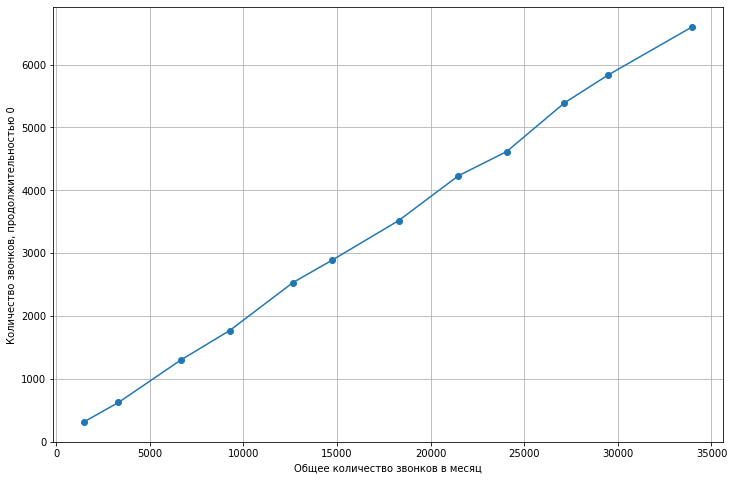

In [46]:
plt.figure(figsize=(12, 8))
plt.plot( call_amount['duration'], call_amount['isnull'], 'o-')
plt.xlabel("Общее количество звонков в месяц")
plt.ylabel("Количество звонков, продолжительностью 0")
plt.grid()
plt.show()

Видим, что зависимость почти линейная,количество звонков, продолжительностью 0, растет вместе с общим количеством звонков.

Удалять такие столбцы будет потерей важных данных в остальных столбцах, а заменять на отвлеченные значения - не совсем правильный подход в данной ситуации. Поэтому я оставлю данные неизмененными. На среднее медианное значение эти данные не повлияют.

Таблица ***internet***

In [47]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
session_id      149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.6+ MB


In [48]:
print("Объем интернет трафика, равный 0: {}".format(len(internet[internet['mb_used'] == 0])))

Объем интернет трафика, равный 0: 19598


Нулевые значения могли появится из-за того, что клиенты могут вообще не пользоваться мобильным интернетом в течении месяца.

Как и со звонками, посмотрим на зависимость количества интернет сессий за месяц и таких сессий, где объем потраченного трафика был равен нулю.

In [49]:
internet['month'] = internet['session_date'].dt.month
internet

,session_id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,319,2018-10-03,1499,10
149392,1499_153,491,2018-12-14,1499,12
149393,1499_154,0,2018-10-27,1499,10
149394,1499_155,1247,2018-11-26,1499,11


In [50]:
def isnull_mb(row):
    mb_used = row['mb_used']
    
    if mb_used == 1:
        return 1
    else:
        return 0
internet['isnull_mb'] = internet.apply(isnull_mb, axis=1)

In [51]:
internet_amount = internet.groupby(by='month').agg({'mb_used':'count', 'isnull_mb':'sum'})
internet_amount

,mb_used,isnull_mb
month,,
1,1117,0
2,2641,1
3,4885,7
4,6511,5
5,9408,4
6,11057,6
7,13548,8
8,16092,12
9,17512,20


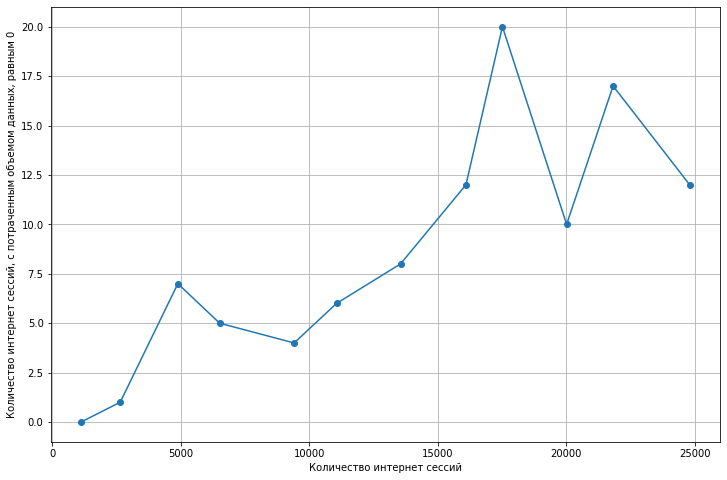

In [52]:
plt.figure(figsize=(12, 8))
plt.plot(internet_amount['mb_used'], internet_amount['isnull_mb'], '-o')
plt.xlabel("Количество интернет сессий")
plt.ylabel("Количество интернет сессий, c потраченным объемом данных, равным 0")
plt.grid()
plt.show()

Зависимость количсетва интернет сессий от количества сессий, где потраченный объем равен 0, имеет определенные данные, которые отличные от линейного характера. Но в общем, мы все равно можем сказать, что с ростом количества интернет сессий, растет количество нулевых сессий, местами нелиненйно.

Как с таблицей calls, я оставлю эти значения нетронутыми, в дальнейшем, при анализе отфильтрую их, удалять я их не стала, так как они занимают 13% от всего столбца, что может привести к потере других важных данных и искажению результата.

Таблица ***users***.

In [53]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null object
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


Пропушенные значения есть только в столбце churn_date. Пропущенные значения в этом столбце означают то, что во время выгрузки данных, этот тариф был действующим.  Данные значения я могу оставить нетронутыми, так как в будующем исследовании нам не понадобится дата, а значит пропущенные значения нам никак не будут мешать.

#### Расчет для пользователя.

Объеденим таблицы и рассчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

In [54]:
calls.shape

(202607, 6)

In [55]:
users.shape

(500, 8)

In [56]:
# Объединяю таблицы calls и user
users_calls = calls.merge(users,on=['user_id'],how='inner')

In [57]:
group_calls = users_calls.pivot_table(index=['user_id', 'month','tariff','city'],\
                                      values=['duration'], aggfunc=['count', 'sum'])
group_calls.columns=['The number of calls', 'The number of minutes']

In [58]:
group_calls.head(10)

The number of calls  The number of minutes
user_id month tariff city                                                 
1000    5     ultra  краснодар                   22                    159
        6     ultra  краснодар                   43                    172
        7     ultra  краснодар                   47                    340
        8     ultra  краснодар                   52                    408
        9     ultra  краснодар                   58                    466
        10    ultra  краснодар                   57                    350
        11    ultra  краснодар                   43                    338
        12    ultra  краснодар                   46                    333
1001    11    smart  москва                      59                    430
        12    smart  москва                      63                    414

Получила таблицу с информацией о количестве сделанных звонков и израсходованных минут в месяц каждым пользователем.

In [59]:
messages['month'] = messages['message_date'].dt.month

In [60]:
# Объединяю таблицы messages и user
users_messages = messages.merge(users,on=['user_id'],how='inner')


In [61]:
# Создаю столбец с информацией о пользователе (город, имя и фамилия)
users_messages['unique_name'] = users_messages['city'] + [' '] +\
users_messages['first_name'] + [' ']+ users_messages['last_name']

In [62]:
group_messages = users_messages.pivot_table(index=['user_id', 'month', 'tariff', 'city'],\
                                            values=['unique_name'], aggfunc=['count'])
group_messages.columns=['The number of messages']
group_messages.head(10)

The number of messages
user_id month tariff city                               
1000    5     ultra  краснодар                        22
        6     ultra  краснодар                        60
        7     ultra  краснодар                        75
        8     ultra  краснодар                        81
        9     ultra  краснодар                        57
        10    ultra  краснодар                        73
        11    ultra  краснодар                        58
        12    ultra  краснодар                        70
1002    6     smart  стерлитамак                       4
        7     smart  стерлитамак                      11

Получила таблицу с информацией о количестве отправленных сообщений по месяцам.

In [63]:
# Объединяю таблицы messages и user
users_internet = internet.merge(users,on=['user_id'],how='inner')

In [64]:
group_internet = users_internet.pivot_table(index=['user_id', 'month', 'tariff', 'city'],\
                                            values=['mb_used'], aggfunc='sum')
group_internet.columns=['Consumed Internet traffic']
group_internet.head(10)

Consumed Internet traffic
user_id month tariff city                                
1000    5     ultra  краснодар                       2256
        6     ultra  краснодар                      23257
        7     ultra  краснодар                      14016
        8     ultra  краснодар                      14070
        9     ultra  краснодар                      14581
        10    ultra  краснодар                      14717
        11    ultra  краснодар                      14768
        12    ultra  краснодар                       9827
1001    11    smart  москва                         18452
        12    smart  москва                         14053

Получила таблицу с информацией об израсходованном объеме интернет-трафика в месяц каждым пользователем.

Объеденю все таблички в одну.

In [65]:
group_calls.shape

(3174, 2)

In [66]:
group_internet.shape

(3203, 1)

In [67]:
group_messages.shape

(2717, 1)

In [68]:
group_data = group_calls.merge(group_messages, on=['user_id', 'month', 'tariff','city'],\
                               how='inner').merge(group_internet, on=['user_id', 'month', 'tariff', 'city'],\
                                                  how='inner')
group_data.reset_index(inplace=True)
group_data.head(10)

,user_id,month,tariff,city,The number of calls,The number of minutes,The number of messages,Consumed Internet traffic
0,1000,5,ultra,краснодар,22,159,22,2256
1,1000,6,ultra,краснодар,43,172,60,23257
2,1000,7,ultra,краснодар,47,340,75,14016
3,1000,8,ultra,краснодар,52,408,81,14070
4,1000,9,ultra,краснодар,58,466,57,14581
5,1000,10,ultra,краснодар,57,350,73,14717
6,1000,11,ultra,краснодар,43,338,58,14768
7,1000,12,ultra,краснодар,46,333,70,9827
8,1002,6,smart,стерлитамак,15,117,4,10871
9,1002,7,smart,стерлитамак,26,214,11,17601


Осталось рассчитать помесячную выручку с каждого пользователя.

In [69]:
group_data.shape

(2667, 8)

In [70]:
# Функция для расчета помесячной выручки
def proceed(row):
    
    calls = row['The number of calls']
    duration = row['The number of minutes']
    messages = row['The number of messages']
    mb = row['Consumed Internet traffic']
    tariff = row['tariff']
    
    if tariff == 'smart':
        extra_minutes = duration - tariffs.loc[0, 'minutes_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        extra_mb = mb - tariffs.loc[0, 'mb_per_month_included']
        
        if extra_minutes < 0:
            extra_minutes = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_mb < 0:
            extra_mb = 0
            
        proceed = extra_minutes * tariffs.loc[0, 'rub_per_minute'] +\
        extra_messages * tariffs.loc[0, 'rub_per_message'] +\
        extra_mb * tariffs.loc[0, 'rub_per_gb'] / 1024 + tariffs.loc[0, 'rub_monthly_fee'] 
        
    if tariff == 'ultra':
        extra_minutes = duration - tariffs.loc[1, 'minutes_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        extra_mb = mb - tariffs.loc[1, 'mb_per_month_included']
        
        if extra_minutes < 0:
            extra_minutes = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_mb < 0:
            extra_mb = 0
        if extra_mb > 0:
            extra_mb = np.ceil(extra_mb / 1024)
            
        proceed = extra_minutes * tariffs.loc[1, 'rub_per_minute'] +\
        extra_messages * tariffs.loc[1, 'rub_per_message'] +\
        extra_mb * tariffs.loc[1, 'rub_per_gb'] + tariffs.loc[1, 'rub_monthly_fee']
    
    return proceed


In [71]:
group_data['proceed'] = group_data.apply(proceed, axis=1)
group_data.head(10)

,user_id,month,tariff,city,The number of calls,The number of minutes,The number of messages,Consumed Internet traffic,proceed
0,1000,5,ultra,краснодар,22,159,22,2256,1950.000000
1,1000,6,ultra,краснодар,43,172,60,23257,1950.000000
2,1000,7,ultra,краснодар,47,340,75,14016,1950.000000
3,1000,8,ultra,краснодар,52,408,81,14070,1950.000000
4,1000,9,ultra,краснодар,58,466,57,14581,1950.000000
5,1000,10,ultra,краснодар,57,350,73,14717,1950.000000
6,1000,11,ultra,краснодар,43,338,58,14768,1950.000000
7,1000,12,ultra,краснодар,46,333,70,9827,1950.000000
8,1002,6,smart,стерлитамак,15,117,4,10871,550.000000
9,1002,7,smart,стерлитамак,26,214,11,17601,987.695312


### Шаг 3. Анализ данных

Посмотрим, сколько в среднем нужно каждому пользователю каждого из двух тарифов минут разговора, сообщений, объем интернет трафика.

In [72]:
avr_data = group_data.pivot_table(index=['user_id', 'tariff', 'city'],\
                                  values=['The number of minutes', 'The number of messages', 'Consumed Internet traffic', 'proceed'], aggfunc='median')
avr_data.reset_index(inplace=True)

In [73]:
avr_data.head(10)

,user_id,tariff,city,Consumed Internet traffic,The number of messages,The number of minutes,proceed
0,1000,ultra,краснодар,14325.5,65.0,339.0,1950.000000
1,1002,smart,стерлитамак,17601.0,11.0,214.0,987.695312
2,1003,ultra,москва,11368.0,83.0,824.0,1950.000000
3,1004,ultra,новокузнецк,17828.5,154.5,132.5,1950.000000
4,1005,smart,набережные челны,7843.0,49.0,593.5,836.500000
5,1007,smart,москва,14444.0,26.0,480.0,843.500000
6,1008,smart,челябинск,13236.0,56.0,339.0,568.000000
7,1009,smart,пермь,17754.5,12.0,221.0,1017.675781
8,1011,smart,самара,18570.0,12.5,454.5,1363.625000
9,1012,smart,санкт-петербург,22212.0,14.5,226.5,1888.281250


Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [74]:
stat_data = avr_data.pivot_table(index=['tariff'],\
                                 values=['Consumed Internet traffic', 'The number of messages',\
                                         'The number of minutes'],\
                                 aggfunc={'Consumed Internet traffic':[np.median, np.var, np.std],\
                                          'The number of messages':[np.median, np.var, np.std],\
                                          'The number of minutes':[np.median, np.var, np.std]})

In [75]:
stat_data.reset_index()

tariff Consumed Internet traffic                             \
                            median          std           var   
0  smart                   16961.0  4429.914928  1.962415e+07   
1  ultra                   19750.5  8519.097391  7.257502e+07   

  The number of messages                         The number of minutes  \
                  median        std          var                median   
0                   35.0  26.408916   697.430842                 445.0   
1                   65.0  45.102901  2034.271693                 548.5   

                             
          std           var  
0  160.125039  25640.028173  
1  293.636477  86222.380342

Построим диаграммы размаха.

In [76]:
smart_tariff = group_data.query('tariff == "smart"')
ultra_tariff = group_data.query('tariff == "ultra"')

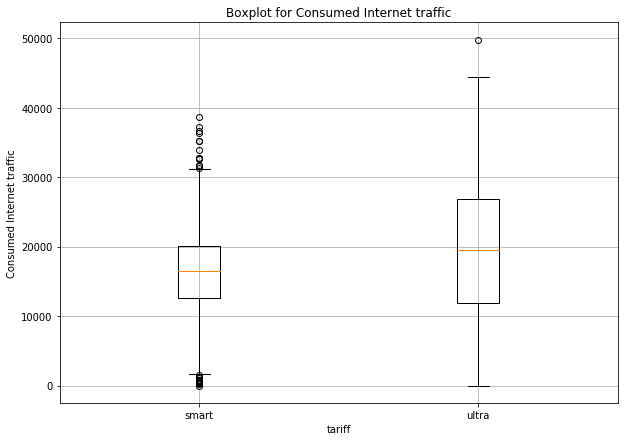

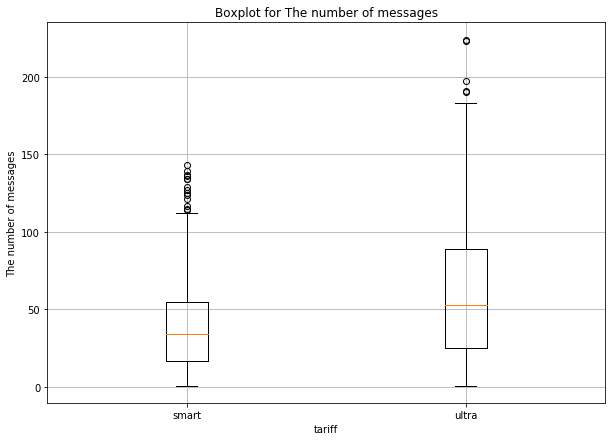

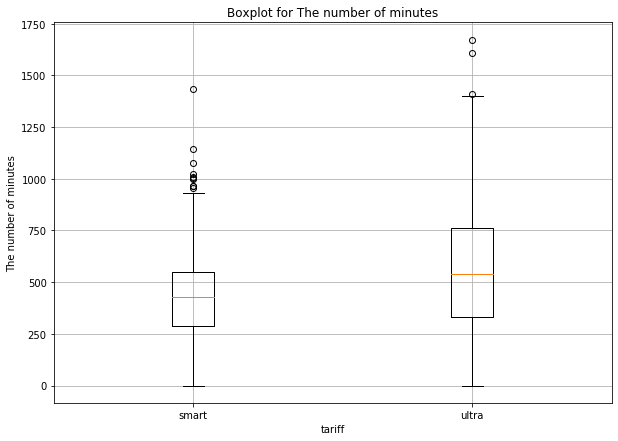

In [77]:
for name in ['Consumed Internet traffic', 'The number of messages', 'The number of minutes']:
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(smart_tariff[name], positions =[1])
    plt.boxplot(ultra_tariff[name], positions =[2])
    plt.xlabel('tariff')
    plt.ylabel(name)
    plt.xticks([1, 2], ['smart', 'ultra'])
    plt.grid()
    plt.title('Boxplot for {}'.format(name))

Из таблицы статистик и диаграмм размаха видно, что потраченный объем интернет-траффика, сообщения и звонки у тарифа "Ультра" имеет большую дисперсию, по сравнению с тарифом "Смарт", значит, что разброс значений вокруг среднего значения больше у тарифа "Ультра".

Но, у более дешевого тарифа("Смарт") намного больше выбросов, так же медиана смещена в верх, что значит, что значения редкие.

Построим теперь гистаграммы.

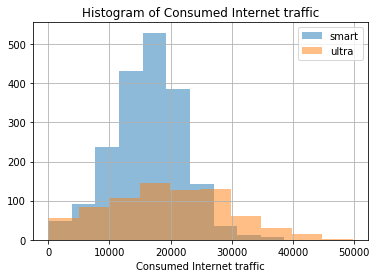

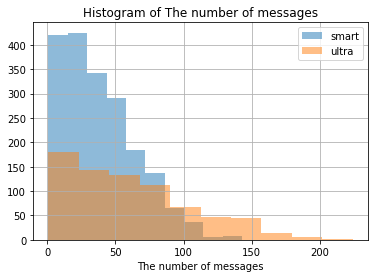

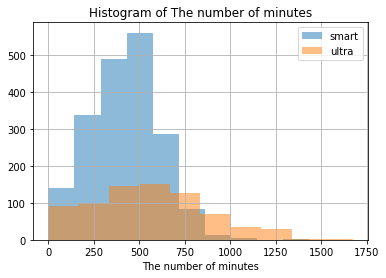

In [78]:
for element in ['Consumed Internet traffic', 'The number of messages', 'The number of minutes']:
    
    plt.hist(smart_tariff[element], alpha=0.5)
    plt.hist(ultra_tariff[element], alpha = 0.5)
    plt.xlabel(element)
    plt.legend(['smart', 'ultra'])
    plt.title('Histogram of {}'.format(element))
    plt.grid()
    plt.show()

Тариф "Смарт" имеет нормальное распредление данных по использованию интернет трафика в месяц. Тариф "Ультра" имеет большие диапазон значений, что нам сказало большее знаечение дисперсии. Мы можем видеть аналогичное поведение на остальных графиках тоже.

Также можем заметить, что у тарифа смарт на графике явно выражена мода, особенно у данных об использовании интернет трафика и минут разговора.

Можем сделать выбор, что у людей, предпочитающих более дорогой тариф, нет таких строгих ограничей, они не так следят за тем, сколько потратили минут, сообщений и Мб интернет-трафика, поэтому разброс значений больше, дисперсия больше. Что не сказать о тех людях, которые приобретаю более дешевый тариф, у них есть четкие рамки в использовании данных параметров, а значит они будут стремится не выйти за рамки, чем обусловлена выраженная мода на графиках.

### Шаг 4. Проверка гипотез

Начнем с формирования нулевой гипотезы H₀. Она звучит так: Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.

Исходя из H₀ сформулирую альтернативную гипотезу H₁, которая будет звучит так: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

В нашем случае генеральных совокупностей две. Мне нужно сопоставить их среднее. Применю метод **scipy.stats.ttest_ind()**

In [79]:
ttest_ultra = avr_data.query('tariff=="ultra"')
ttest_smart = avr_data.query('tariff=="smart"')


Проведем проверку дисперсии выборок


In [88]:
from scipy.stats import levene

In [91]:
stat, p = levene(ttest_ultra['proceed'], ttest_smart['proceed'])
p

6.404471897818373e-17


Такое маленькое значение говорит о том, что выборки не имеют одинаковые дисперсиию


In [101]:
np.var(ttest_ultra['proceed'], ddof=1)

72814.944589309

In [102]:
np.var(ttest_smart['proceed'], ddof=1)

563172.9123629369

In [80]:
alpha = .05

In [98]:
results = st.ttest_ind(ttest_ultra['proceed'], ttest_smart['proceed'], equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.35854991873521e-43
Отвергаем нулевую гипотезу


Посмотрим на среднюю вырочку по тарифам

In [82]:
avr_data.pivot_table(index='tariff', values='proceed', aggfunc='median')

,proceed
tariff,
smart,1082.023438
ultra,1950.000000


Действительно, видим, что средняя выручка у тарифа "Смарт" в 1,8 раза меньше, чем у тарифа "Ультра".

Проверим следующую гипотезу, формирую нулевую гипотезу H₀, которая звучит так: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Исходя их нулевой гипотезы, сформирую альтернативную гипотезу H₁: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [83]:
ttest_moscow = avr_data.query('city == "москва"')
ttest_region = avr_data.query('city != "москва"')


In [100]:
stat, p = levene(ttest_moscow['proceed'], ttest_region['proceed'])
p

0.6427415691417846

In [103]:
np.var(ttest_moscow['proceed'], ddof=1)

447836.3695431726

In [104]:
np.var(ttest_region['proceed'], ddof=1)

571933.5383653451

Видно, что дисперсия у выборок не одинаковая тоже.

In [107]:

result_mos_reg = st.ttest_ind(ttest_moscow['proceed'], ttest_region['proceed'], equal_var=False)
print('p-значение: {}'.format(result_mos_reg.pvalue))

if (result_mos_reg.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6051364909629173
Не получилось отвергнуть нулевую гипотезу


Посмотрим на числа в столбце.

In [85]:
def mos_region(row):
    
    city = row['city']
    if city == 'москва':
        return 'москва'
    else:
        return 'регионы'
avr_data['mos_region'] = avr_data.apply(mos_region, axis=1)

In [86]:
avr_data.pivot_table(index='mos_region', values='proceed', aggfunc='median')

,proceed
mos_region,
москва,1485.632812
регионы,1444.394531


Действительно, видим, что отличие в 40 рублей, что довольно незначительно. Потвердили еще раз, что нулевую гипотезу не получилось отвергнуть, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Общий вывод.

Во время проведенной работы были изучены данные, выявлены пропуски, ошибки, они были обработаны. Выделяющиеся нулевые значения в таблице calls и internet было решено оставить, не удалять и никак не обрабатывать. Также был заменен тип данных, где необходимо, для удобной работы с данными.

Для каждого пользователя были посчитаны:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.
Таблицы были объедененны в одну для дальнейшей удобной работы и нагляности полученных результатов.

Были посчитаны: среднее количество, дисперсию и стандартное отклонение.
Построены диаграммы размаха и гистограммы. Сделан вывод, что тариф "Ультра" имеет большую дисперсию по параметрам( звонки, сообщения, объем потраченного интернет трафика), чем тариф "Смарт". У тарифа "Смарт" намного больше выбросов, что говорит о том, что людям, которые им пользуются, недостаточно предоставленных минут, сообщений и объема интренет трафика в месяц. Разброс значений больше у тарифа "Ультра", что говорит о том, что люди, пользующиеся им, не всегда используют по полной, поэтому диапазон значений у него больше, чем у тарифа "Смарт".

Также, я выяснила, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. А вот средняя выручка между Москвой и другими регионами практически не отличается.

Как мы узнали, больший доход компания "Мегалайн" получает с тарифа "Ультра", клиенты не расходуют весь предоставленный им пакет параметров, что значит, что им не нужно доплачивать сверх месячной платы. Этот тариф приносит компании больше денег. Но, количество пользователей у тарифа "Смарт" больше, почти в 3 раза. 

In [87]:
rev_piv_table = avr_data.pivot_table(index='tariff', values='proceed', aggfunc=['count', 'sum'])
rev_piv_table.columns = ['Кол-во пользователей', 'Общая выручка тарифа']
rev_piv_table['% от общей выручки компании'] = rev_piv_table['Общая выручка тарифа'] / \
                                               rev_piv_table['Общая выручка тарифа'].sum()
rev_piv_table.style.format({'% от общей выручки компании': '{:.1%}'})

,Кол-во пользователей,Общая выручка тарифа,% от общей выручки компании
tariff,,,
smart,301,379077,61.2%
ultra,118,240225,38.8%


Видно, что тариф "Смарт" приносит 60 процентов от общей выручки всей компании.

Значит, что для компании тариф "Смарт" выгоднее.